In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline

In [2]:
in_data = pd.read_csv('input_datasets/IMDb Movies India.csv',encoding='latin-1')
in_data.dropna(inplace=True)
in_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Frequency encoding so that popular actors/directors get higher ratings

In [3]:
def one_hot_encode_column(df, column):
    # Split the values in the column and create a new DataFrame
    df_expanded = df[column].str.get_dummies(sep=',')
    
    # Join the new one-hot encoded columns to the original DataFrame
    df = df.join(df_expanded)
    
    return df

In [4]:
dfe = one_hot_encode_column(in_data, 'Genre')

# Display the final DataFrame
dfe.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,0,0,0,0,0,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,...,0,0,0,0,0,0,0,0,0,0
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,...,0,0,0,0,0,0,0,0,0,0
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,...,0,1,0,0,0,0,0,0,0,0


In [5]:
import re
def clean_year(year):
    return re.sub(r'[\(\)]', '', year)  # to remove regular expression 

# Function to remove 'min' from duration
def clean_duration(duration):
    return duration.replace(' min', '') # to remove a particular string

# Apply the functions to the respective columns
dfe['Year'] = dfe['Year'].apply(clean_year).astype(int)
dfe['Duration'] = dfe['Duration'].apply(clean_duration).astype(int)

dfe.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,0,0,0,0,0,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,...,0,0,0,0,0,0,0,0,0,0
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,...,0,0,0,0,0,0,0,0,0,0
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,...,0,1,0,0,0,0,0,0,0,0


In [6]:
# feature engineering , frequency encoding

def freq_encoading(column):
    count = dfe[column].value_counts()
    dfe[column] = dfe[column].map(count)
    return in_data[column]

freq_encoading('Actor 1')
freq_encoading('Actor 2')
freq_encoading('Actor 3')
freq_encoading('Director')

dfe.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,1,5,1,2,...,0,0,0,0,0,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,15,18,15,11,...,0,0,0,0,0,0,0,0,0,0
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",6,20,3,8,...,0,0,0,0,0,0,0,0,0,0
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,1,1,6,1,...,0,1,0,0,0,0,0,0,0,0


In [13]:
# Sample DataFrame with a 'genre' column
# target encoding 
df = pd.read_csv('input_datasets/IMDb Movies India.csv',encoding='latin-1')
df.dropna(inplace=True)
df['genre'] = df['Genre']

# Split genres and explode
df['genre'] = df['genre'].str.split('|')
df_expanded = df.explode('genre')

# Calculate mean rating for each genre
genre_target_mean = df_expanded.groupby('genre')['Rating'].mean()

# Map mean ratings back to DataFrame
df['genre_target_mean'] = df['genre'].apply(lambda genres: sum(genre_target_mean[genre] for genre in genres) / len(genres))

# Display the final DataFrame
df.drop(['genre','Genre'],axis=1,inplace=True)
df.head()


def freq_encoading(column):
    count = df[column].value_counts()
    df[column] = df[column].map(count)
    return df[column]

freq_encoading('Actor 1')
freq_encoading('Actor 2')
freq_encoading('Actor 3')
freq_encoading('Director')

def clean_votes(votes):
    return re.sub(r'[\,]', '', votes) 


# Apply the functions to the respective columns
df['Year'] = df['Year'].apply(clean_year).astype(int)
df['Duration'] = df['Duration'].apply(clean_duration).astype(int)
df['Votes'] = df['Votes'].apply(clean_votes).astype(int)



df.head()


,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,genre_target_mean
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,1,2,1,1,6.415521
3,#Yaaram,2019,110,4.4,35,1,5,1,2,5.716822
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,15,18,15,11,6.242222
6,...Yahaan,2005,142,7.4,1086,6,20,3,8,6.820000
8,?: A Question Mark,2012,82,5.6,326,1,1,6,1,5.477778


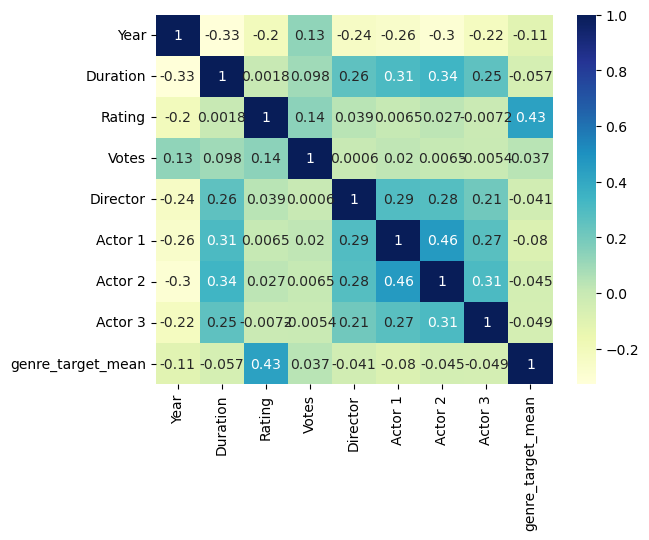

In [15]:
import matplotlib.pyplot  as plt
import seaborn as sns

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
# import decision tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# splitting data
y = dfe['Rating']
X = dfe.drop(['Rating','Name','Genre','Votes'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = LinearRegression()
model1.fit(X_train, y_train)
y1_pred = model1.predict(X_test)


mse1 = mean_squared_error(y_test,y1_pred)
r21 = r2_score(y_test,y1_pred)
print(mse1,'  ',r21)





1.7266827859814597    0.14246978568995683


In [19]:
from sklearn.linear_model import LinearRegression
# import decision tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# splitting data
y = df['Rating']
X = df[['Votes','genre_target_mean']]
X_train, X_test, y_train, y_test = train_test_split(X, y)

model01 = LinearRegression()
model01.fit(X_train, y_train)
y01_pred = model01.predict(X_test)


mse01 = mean_squared_error(y_test,y01_pred)
r021 = r2_score(y_test,y01_pred)
print(mse01,'  ',r021)


1.507161833339574    0.17450286193160058


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#importing extreame gradient boost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
 

Dmodel = RandomForestRegressor()
Dmodel.fit(X_train, y_train)
Y2_pred = Dmodel.predict(X_test)

mse2 = mean_squared_error(y_test,Y2_pred)
r22 = r2_score(y_test,Y2_pred)
print(mse1,'  ',r22)


1.685907907227769    0.23961679415870019
